In [11]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as plt
from sklearn.metrics import accuracy_score

In [12]:
# Loading in the data set
df =pd.read_csv('../csv_files/Model_Ready_Regression.csv', header=0, index_col=0)

In [13]:
# Splitting the dataset so that target variable is isolated
X, Y = df.iloc[:,:-1],df.iloc[:,-1]

In [14]:
# Creating the DMatrix which is used with XGBoost
df_dmatrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [15]:
# Going to split our data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [16]:
# Going to create our XGBoost model. We are using Classifier since trying to predict 
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.5, max_depth = 4, 
                           n_estimators = 150, random_state=2019)

# Fitting our model
xg_reg.fit(X_train,Y_train)

# Making predictions on our model
preds = xg_reg.predict(X_test)

In [17]:
# evaluate predictions
accuracy = accuracy_score(Y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [18]:
# Printing out the 'RMSE' in order to see how accurate we were
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.914381


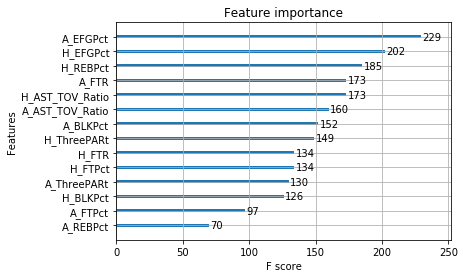

In [19]:
# Plotting the feature importance of each variable 
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 10]